In [1]:
# 所有引用都写在这里 避免冲突 如需要pip请写readme
# 提commit 请加备注 不然merge branch 容易冲突
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


## import the data and analyze the miss data

In [127]:
datacsv = pd.read_csv('/Users/bryankan/Code/BUAI445/project/data/The Math Company Project Data Revenue_ADS_v19.csv')

In [100]:
np.set_printoptions(threshold=1e6)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [11]:
datacsv.tail()

,week_start,AutotraderInventory_FranchiseDealers_Inventory,AutotraderInventory_IndieDealers_Inventory,AutotraderInventory_TotalDealers_Inventory,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,BrandMedia_Radio_Spends,BrandMedia_Social_Spends,BrandMedia_TotalDigitalVideo_Spends,CargurusInventory_AllFranchiseDealers_Inventory,CargurusInventory_AllIndieDealers_Inventory,CargurusInventory_PayingFranchiseDealers_Inventory,CargurusInventory_PayingIndieDealers_Inventory,CargurusInventory_TotalAllDealers_Inventory,CargurusInventory_TotalPayingDealers_Inventory,clientInventory_FranchiseDealers_Inventory,clientInventory_IndieDealers_Inventory,clientInventory_TotalDealers_Inventory,Competitor_CDKGlobal_CostofRevenue,Competitor_CDKGlobal_MarketingandSales,Competitor_CDKGlobal_OperatingExpense,Competitor_CDKGlobal_Revenue,Competitor_CDKWebsite_CostofRevenue,Competitor_CDKWebsite_MarketingandSales,Competitor_CDKWebsite_OperatingExpense,Competitor_CDKWebsite_Revenue,Competitor_CarGurus_CostofRevenue,Competitor_CarGurus_MarketingandSales,Competitor_CarGurus_OperatingExpense,Competitor_CarGurus_Revenue,Competitor_client.com_CostofRevenue,Competitor_client.com_MarketingandSales,Competitor_client.com_OperatingExpense,Competitor_client.com_Revenue,Competitor_TrueCar_CostofRevenue,Competitor_TrueCar_MarketingandSales,Competitor_TrueCar_OperatingExpense,Competitor_TrueCar_Revenue,Macro_Total_Population,Macro_Total_RealDisposablePersonalIncomePerCapita,Macro_Total_TotalVehicleSales,NonPaid_Apps_Leads,NonPaid_Apps_Visits,NonPaid_Direct_Leads,NonPaid_Direct_Visits,NonPaid_Email_Leads,NonPaid_Email_Visits,NonPaid_OtherProperties_Leads,NonPaid_OtherProperties_Visits,NonPaid_SEO_Leads,NonPaid_SEO_Visits,PerformanceMedia_App_Spends,PerformanceMedia_Display_Leads,PerformanceMedia_Display_Spends,PerformanceMedia_Display_Visits,PerformanceMedia_PaidSearch_Leads,PerformanceMedia_PaidSearch_Spends,PerformanceMedia_PaidSearch_Visits,PerformanceMedia_Partner_Leads,PerformanceMedia_Partner_Visits,PerformanceMedia_Partners_Spends,RevenueByBusiness_ConversationsDI_Revenue,RevenueByBusiness_FuelFuel_Revenue,RevenueByBusiness_NTMAclient_Revenue,RevenueByBusiness_OnlineShopperDI_Revenue,RevenueByBusiness_Packageclient_Revenue,RevenueByBusiness_Upsellclient_Revenue,RevenueByBusiness_WebsiteDI_Revenue,RevenueByCancel_Field_Revenue,RevenueByCancel_Groups_Revenue,RevenueByCancel_Inside_Revenue,RevenueByMarketplace_Field_Revenue,RevenueByMarketplace_Groups_Revenue,RevenueByMarketplace_Inside_Revenue,RevenueByPackage_Fran_Revenue,RevenueByPackage_Indy_Revenue,RevenueByProduct_DRLegacy_Revenue,RevenueByProduct_NonTraditional_Revenue,RevenueByProduct_Package_Revenue,RevenueByProduct_Upsell_Revenue,RevenueByRetail_DealerInspire_Revenue,RevenueByRetail_Fuel_Revenue,RevenueByRetail_Marketplace_Revenue,RevenueByRetail_OEM_Revenue,RevenueByRetail_Other_Revenue,RevenueBySale_Field_Revenue,RevenueBySale_Groups_Revenue,RevenueBySale_Inside_Revenue,RevenueByTotalWholesale_Amortization_Revenue,RevenueByTotalWholesale_Wholesale_Revenue,RevenueByUpsell_client360_Revenue,RevenueByUpsell_clientSocial_Revenue,RevenueByUpsell_DealerPosition_Revenue,RevenueByUpsell_DealerRaterConnections_Revenue,RevenueByUpsell_EventPositions_Revenue,RevenueByUpsell_NLP_Revenue,RevenueByUpsell_PowerPositions_Revenue,RevenueByUpsell_PreferredTradeIn_Revenue,RevenueByUpsell_Premier_Revenue,RevenueByUpsell_RepairPalCertified_Revenue,RevenueByUpsell_SocialSalesDrive_Revenue,RevenueByUpsell_StandardTradeIn_Revenue,Sales_Promo_Count,Total_DeseasonalizedMarketplace_Revenue,Total_Marketplace_SeasonalIndex,Total_Total_Visits,Total_Total_flag-covidlockdown1,Total_Total_flag-covidlockdown2,Total_Total_flag-covidpostlockdown,Total_Total_flag-covidpostlockdown2,Total_Total_flag-covidpostlockdown3,Total_Total_flag-covidpostlockdown4,Total_Total_flag-janfeb,Total_Total_flag-monthstart,Total_Total_fl

In [5]:
datacsv.describe()

,AutotraderInventory_FranchiseDealers_Inventory,AutotraderInventory_IndieDealers_Inventory,AutotraderInventory_TotalDealers_Inventory,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,BrandMedia_Radio_Spends,BrandMedia_Social_Spends,BrandMedia_TotalDigitalVideo_Spends,CargurusInventory_AllFranchiseDealers_Inventory,CargurusInventory_AllIndieDealers_Inventory,CargurusInventory_PayingFranchiseDealers_Inventory,CargurusInventory_PayingIndieDealers_Inventory,CargurusInventory_TotalAllDealers_Inventory,CargurusInventory_TotalPayingDealers_Inventory,clientInventory_FranchiseDealers_Inventory,clientInventory_IndieDealers_Inventory,clientInventory_TotalDealers_Inventory,Competitor_CDKGlobal_CostofRevenue,Competitor_CDKGlobal_MarketingandSales,Competitor_CDKGlobal_OperatingExpense,Competitor_CDKGlobal_Revenue,Competitor_CDKWebsite_CostofRevenue,Competitor_CDKWebsite_MarketingandSales,Competitor_CDKWebsite_OperatingExpense,Competitor_CDKWebsite_Revenue,Competitor_CarGurus_CostofRevenue,Competitor_CarGurus_MarketingandSales,Competitor_CarGurus_OperatingExpense,Competitor_CarGurus_Revenue,Competitor_client.com_CostofRevenue,Competitor_client.com_MarketingandSales,Competitor_client.com_OperatingExpense,Competitor_client.com_Revenue,Competitor_TrueCar_CostofRevenue,Competitor_TrueCar_MarketingandSales,Competitor_TrueCar_OperatingExpense,Competitor_TrueCar_Revenue,Macro_Total_Population,Macro_Total_RealDisposablePersonalIncomePerCapita,Macro_Total_TotalVehicleSales,NonPaid_Apps_Leads,NonPaid_Apps_Visits,NonPaid_Direct_Leads,NonPaid_Direct_Visits,NonPaid_Email_Leads,NonPaid_Email_Visits,NonPaid_OtherProperties_Leads,NonPaid_OtherProperties_Visits,NonPaid_SEO_Leads,NonPaid_SEO_Visits,PerformanceMedia_App_Spends,PerformanceMedia_Display_Leads,PerformanceMedia_Display_Spends,PerformanceMedia_Display_Visits,PerformanceMedia_PaidSearch_Leads,PerformanceMedia_PaidSearch_Spends,PerformanceMedia_PaidSearch_Visits,PerformanceMedia_Partner_Leads,PerformanceMedia_Partner_Visits,PerformanceMedia_Partners_Spends,RevenueByBusiness_ConversationsDI_Revenue,RevenueByBusiness_FuelFuel_Revenue,RevenueByBusiness_NTMAclient_Revenue,RevenueByBusiness_OnlineShopperDI_Revenue,RevenueByBusiness_Packageclient_Revenue,RevenueByBusiness_Upsellclient_Revenue,RevenueByBusiness_WebsiteDI_Revenue,RevenueByCancel_Field_Revenue,RevenueByCancel_Groups_Revenue,RevenueByCancel_Inside_Revenue,RevenueByMarketplace_Field_Revenue,RevenueByMarketplace_Groups_Revenue,RevenueByMarketplace_Inside_Revenue,RevenueByPackage_Fran_Revenue,RevenueByPackage_Indy_Revenue,RevenueByProduct_DRLegacy_Revenue,RevenueByProduct_NonTraditional_Revenue,RevenueByProduct_Package_Revenue,RevenueByProduct_Upsell_Revenue,RevenueByRetail_DealerInspire_Revenue,RevenueByRetail_Fuel_Revenue,RevenueByRetail_Marketplace_Revenue,RevenueByRetail_OEM_Revenue,RevenueByRetail_Other_Revenue,RevenueBySale_Field_Revenue,RevenueBySale_Groups_Revenue,RevenueBySale_Inside_Revenue,RevenueByTotalWholesale_Amortization_Revenue,RevenueByTotalWholesale_Wholesale_Revenue,RevenueByUpsell_client360_Revenue,RevenueByUpsell_clientSocial_Revenue,RevenueByUpsell_DealerPosition_Revenue,RevenueByUpsell_DealerRaterConnections_Revenue,RevenueByUpsell_EventPositions_Revenue,RevenueByUpsell_NLP_Revenue,RevenueByUpsell_PowerPositions_Revenue,RevenueByUpsell_PreferredTradeIn_Revenue,RevenueByUpsell_Premier_Revenue,RevenueByUpsell_RepairPalCertified_Revenue,RevenueByUpsell_SocialSalesDrive_Revenue,RevenueByUpsell_StandardTradeIn_Revenue,Sales_Promo_Count,Total_DeseasonalizedMarketplace_Revenue,Total_Marketplace_SeasonalIndex,Total_Total_Visits,Total_Total_flag-covidlockdown1,Total_Total_flag-covidlockdown2,Total_Total_flag-covidpostlockdown,Total_Total_flag-covidpostlockdown2,Total_Total_flag-covidpostlockdown3,Total_Total_flag-covidpostlockdown4,Total_Total_flag-janfeb,Total_Total_flag-monthstart,Total_Total_flag-precontr

In [12]:
datacsv.isna().sum()

week_start                                              4
AutotraderInventory_FranchiseDealers_Inventory        120
AutotraderInventory_IndieDealers_Inventory            120
AutotraderInventory_TotalDealers_Inventory            120
BrandMedia_Addressable/Linear_Spends                   82
BrandMedia_ConnectedTV_Spends                          82
BrandMedia_Default_Spends                              82
BrandMedia_Display_Spends                              82
BrandMedia_LiveStreamVideo_Spends                      82
BrandMedia_OOH_Spends                                  82
BrandMedia_Radio_Spends                                82
BrandMedia_Social_Spends                               82
BrandMedia_TotalDigitalVideo_Spends                    82
CargurusInventory_AllFranchiseDealers_Inventory       120
CargurusInventory_AllIndieDealers_Inventory           120
CargurusInventory_PayingFranchiseDealers_Inventory    120
CargurusInventory_PayingIndieDealers_Inventory        120
CargurusInvent

 ## Q1 Which Marketing channel is most effective?

In [142]:
datacsv = pd.read_csv('/Users/bryankan/Code/BUAI445/project/data/The Math Company Project Data Revenue_ADS_v19.csv')

In [143]:
PerformanceMedia_Display_Leads_mean = datacsv['PerformanceMedia_Display_Leads'].mean()
datacsv['PerformanceMedia_Display_Leads'] = datacsv['PerformanceMedia_Display_Leads'].fillna(PerformanceMedia_Display_Leads_mean)
PerformanceMedia_Display_Visits_mean = datacsv['PerformanceMedia_Display_Visits'].mean()
datacsv['PerformanceMedia_Display_Visits'] = datacsv['PerformanceMedia_Display_Visits'].fillna(PerformanceMedia_Display_Visits_mean)


In [152]:
datacsv['performanceMediaDisplayEffectiveness'] = datacsv['PerformanceMedia_Display_Leads']/datacsv['PerformanceMedia_Display_Visits']
performanceMediaDisplayEffectivenessAvg = datacsv['performanceMediaDisplayEffectiveness'].mean()
performanceMediaDisplayEffectivenessAvg

0.15055153106535357

In [146]:
PerformanceMedia_PaidSearch_Leads_mean = datacsv['PerformanceMedia_PaidSearch_Leads'].mean()
datacsv['PerformanceMedia_PaidSearch_Leads'] = datacsv['PerformanceMedia_PaidSearch_Leads'].fillna(PerformanceMedia_PaidSearch_Leads_mean)
PerformanceMedia_PaidSearch_Visits_mean = datacsv['PerformanceMedia_PaidSearch_Visits'].mean()
datacsv['PerformanceMedia_PaidSearch_Visits'] = datacsv['PerformanceMedia_PaidSearch_Visits'].fillna(PerformanceMedia_PaidSearch_Visits_mean)


In [151]:
# PerformanceMedia_PaidSearch
datacsv['performanceMediaPaidSearchEffectiveness'] = datacsv['PerformanceMedia_PaidSearch_Leads']/datacsv['PerformanceMedia_PaidSearch_Visits']
performanceMediaPaidSearchEffectivenessAvg = datacsv['performanceMediaPaidSearchEffectiveness'].mean()
performanceMediaPaidSearchEffectivenessAvg


0.14844000100421345

In [146]:
PerformanceMedia_Partner_Leads_mean = datacsv['PerformanceMedia_Partner_Leads'].mean()
datacsv['PerformanceMedia_Partner_Leads'] = datacsv['PerformanceMedia_Partner_Leads'].fillna(PerformanceMedia_Partner_Leads_mean)
PerformanceMedia_Partner_Visits_mean = datacsv['PerformanceMedia_Partner_Visits'].mean()
datacsv['PerformanceMedia_Partner_Visits'] = datacsv['PerformanceMedia_Partner_Visits'].fillna(PerformanceMedia_Partner_Visits_mean)


In [154]:
# PerformanceMedia_Partner
datacsv['performanceMediaPartnerEffectiveness'] = datacsv['PerformanceMedia_Partner_Leads']/datacsv['PerformanceMedia_Partner_Visits']
performanceMediaPartnerEffectivenessAvg = datacsv['performanceMediaPartnerEffectiveness'].mean()
performanceMediaPartnerEffectivenessAvg


0.14592753561284166

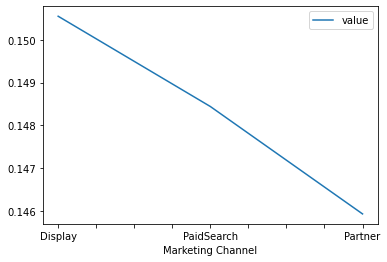

In [160]:
df = pd.DataFrame({'Marketing Channel':['Display', 'PaidSearch', 'Partner'], 'value':[performanceMediaDisplayEffectivenessAvg, performanceMediaPaidSearchEffectivenessAvg,performanceMediaPartnerEffectivenessAvg]})
ax = df.plot.line(x='Marketing Channel', y='value', rot=0)


## Q2  What is ROI from each channel?

In [162]:
datacsv = pd.read_csv('/Users/bryankan/Code/BUAI445/project/data/The Math Company Project Data Revenue_ADS_v19.csv')

In [165]:
totalLeads = datacsv['PerformanceMedia_Display_Leads'][:178].sum() + datacsv['PerformanceMedia_PaidSearch_Leads'][:178].sum() + datacsv['PerformanceMedia_Partner_Leads'][:178].sum()
print(totalLeads)


59143858.77717601


In [166]:
# ROI = revenue / spend = revenue of each channel / spend of each channel
# Channel revenue = Total_DeseasonalizedMarketplace_Revenue * weight of each channel
weightMediaDisplay = datacsv['PerformanceMedia_Display_Leads'][:178].sum() / totalLeads
MediaDisplayRevenue = datacsv['Total_DeseasonalizedMarketplace_Revenue'][:178].sum() * weightMediaDisplay
performanceMediaDisplayROI = MediaDisplayRevenue / datacsv['PerformanceMedia_Display_Spends'][:178].sum()
print(performanceMediaDisplayROI)

5.237647428224605


In [167]:
weightMediaPaidSearch = datacsv['PerformanceMedia_PaidSearch_Leads'][:178].sum() / totalLeads
MediaPaidSearchRevenue = datacsv['Total_DeseasonalizedMarketplace_Revenue'][:178].sum() * weightMediaPaidSearch
performanceMediaPaidSearchROI = MediaPaidSearchRevenue / datacsv['PerformanceMedia_PaidSearch_Spends'][:178].sum()
print(performanceMediaPaidSearchROI)

6.358755363534292


In [168]:
weightMediaPartner = datacsv['PerformanceMedia_Partner_Leads'][:178].sum() / totalLeads
MediaPartnerRevenue = datacsv['Total_DeseasonalizedMarketplace_Revenue'][:178].sum() * weightMediaPartner
performanceMediaPartnerROI = MediaPartnerRevenue / datacsv['PerformanceMedia_Partners_Spends'][:178].sum()
print(performanceMediaPartnerROI)

3.406176274842948


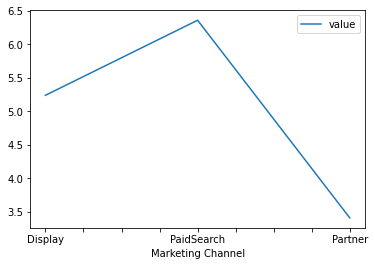

In [170]:
df = pd.DataFrame({'Marketing Channel':['Display', 'PaidSearch', 'Partner'], 'value':[performanceMediaDisplayROI, performanceMediaPaidSearchROI, performanceMediaPartnerROI]})
ax = df.plot.line(x='Marketing Channel', y='value', rot=0)

## Q3 How has the performance of each channel been?

In [171]:
datacsv = pd.read_csv('/Users/bryankan/Code/BUAI445/project/data/The Math Company Project Data Revenue_ADS_v19.csv')

In [172]:
PerformanceMedia_Display_Leads_mean = datacsv['PerformanceMedia_Display_Leads'].mean()
datacsv['PerformanceMedia_Display_Leads'] = datacsv['PerformanceMedia_Display_Leads'].fillna(PerformanceMedia_Display_Leads_mean)
PerformanceMedia_Display_Spends_mean = datacsv['PerformanceMedia_Display_Spends'].mean()
datacsv['PerformanceMedia_Display_Spends'] = datacsv['PerformanceMedia_Display_Spends'].fillna(PerformanceMedia_Display_Spends_mean)


In [174]:
# PerformanceMedia_Display
datacsv['performanceMediaDisplayPerformance'] = datacsv['PerformanceMedia_Display_Spends']/datacsv['PerformanceMedia_Display_Leads']
performanceMediaDisplayPerformanceAvg = datacsv['performanceMediaDisplayPerformance'].mean()
performanceMediaDisplayPerformanceAvg


11.280044856102624

In [175]:
PerformanceMedia_PaidSearch_Spends_mean = datacsv['PerformanceMedia_PaidSearch_Spends'].mean()
datacsv['PerformanceMedia_PaidSearch_Spends'] = datacsv['PerformanceMedia_PaidSearch_Spends'].fillna(PerformanceMedia_PaidSearch_Spends_mean)
PerformanceMedia_PaidSearch_Leads_mean = datacsv['PerformanceMedia_PaidSearch_Leads'].mean()
datacsv['PerformanceMedia_PaidSearch_Leads'] = datacsv['PerformanceMedia_PaidSearch_Leads'].fillna(PerformanceMedia_PaidSearch_Leads_mean)


In [177]:
# PerformanceMedia_PaidSearch
datacsv['performanceMediaPaidSearchPerformance'] = datacsv['PerformanceMedia_PaidSearch_Spends']/datacsv['PerformanceMedia_PaidSearch_Leads']
performanceMediaPaidSearchPerformanceAvg = datacsv['performanceMediaPaidSearchPerformance'].mean()
performanceMediaPaidSearchPerformanceAvg

13.947581774300446

In [178]:
PerformanceMedia_Partners_Spends_mean = datacsv['PerformanceMedia_Partners_Spends'].mean()
datacsv['PerformanceMedia_Partners_Spends'] = datacsv['PerformanceMedia_Partners_Spends'].fillna(PerformanceMedia_Partners_Spends_mean)
PerformanceMedia_Partner_Leads_mean = datacsv['PerformanceMedia_Partner_Leads'].mean()
datacsv['PerformanceMedia_Partner_Leads'] = datacsv['PerformanceMedia_Partner_Leads'].fillna(PerformanceMedia_Partner_Leads_mean)


In [179]:
# PerformanceMedia_Partner
datacsv['performanceMediaPartnerPerformance'] = datacsv['PerformanceMedia_Partners_Spends']/datacsv['PerformanceMedia_Partner_Leads']
performanceMediaPartnerPerformanceAvg = datacsv['performanceMediaPartnerPerformance'].mean()
performanceMediaPartnerPerformanceAvg


11.829266057424173

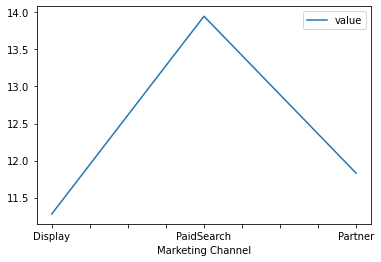

In [182]:
df = pd.DataFrame({'Marketing Channel':['Display', 'PaidSearch', 'Partner'], 'value':[performanceMediaDisplayPerformanceAvg, performanceMediaPaidSearchPerformanceAvg, performanceMediaPartnerPerformanceAvg]})
ax = df.plot.line(x='Marketing Channel', y='value', rot=0)


## Q5

In [104]:
## 快速测试用
datacsv = pd.read_csv('/Users/bryankan/Code/BUAI445/project/data/The Math Company Project Data Revenue_ADS_v19.csv')

In [108]:
datacsv.isna().sum()

week_start                                            0
AutotraderInventory_FranchiseDealers_Inventory        0
AutotraderInventory_IndieDealers_Inventory            0
AutotraderInventory_TotalDealers_Inventory            0
BrandMedia_Addressable/Linear_Spends                  0
BrandMedia_ConnectedTV_Spends                         0
BrandMedia_Default_Spends                             0
BrandMedia_Display_Spends                             0
BrandMedia_LiveStreamVideo_Spends                     0
BrandMedia_OOH_Spends                                 0
BrandMedia_Radio_Spends                               0
BrandMedia_Social_Spends                              0
BrandMedia_TotalDigitalVideo_Spends                   0
CargurusInventory_AllFranchiseDealers_Inventory       0
CargurusInventory_AllIndieDealers_Inventory           0
CargurusInventory_PayingFranchiseDealers_Inventory    0
CargurusInventory_PayingIndieDealers_Inventory        0
CargurusInventory_TotalAllDealers_Inventory     

In [107]:
datacsv = datacsv.dropna()

In [110]:
datacsv = datacsv.drop('AutotraderInventory_FranchiseDealers_Inventory',axis=1)
datacsv = datacsv.drop('AutotraderInventory_IndieDealers_Inventory',axis=1)
datacsv = datacsv.drop('AutotraderInventory_TotalDealers_Inventory',axis=1)

In [111]:
datacsv.tail()

,week_start,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,BrandMedia_Radio_Spends,BrandMedia_Social_Spends,BrandMedia_TotalDigitalVideo_Spends,CargurusInventory_AllFranchiseDealers_Inventory,CargurusInventory_AllIndieDealers_Inventory,CargurusInventory_PayingFranchiseDealers_Inventory,CargurusInventory_PayingIndieDealers_Inventory,CargurusInventory_TotalAllDealers_Inventory,CargurusInventory_TotalPayingDealers_Inventory,clientInventory_FranchiseDealers_Inventory,clientInventory_IndieDealers_Inventory,clientInventory_TotalDealers_Inventory,Competitor_CDKGlobal_CostofRevenue,Competitor_CDKGlobal_MarketingandSales,Competitor_CDKGlobal_OperatingExpense,Competitor_CDKGlobal_Revenue,Competitor_CDKWebsite_CostofRevenue,Competitor_CDKWebsite_MarketingandSales,Competitor_CDKWebsite_OperatingExpense,Competitor_CDKWebsite_Revenue,Competitor_CarGurus_CostofRevenue,Competitor_CarGurus_MarketingandSales,Competitor_CarGurus_OperatingExpense,Competitor_CarGurus_Revenue,Competitor_client.com_CostofRevenue,Competitor_client.com_MarketingandSales,Competitor_client.com_OperatingExpense,Competitor_client.com_Revenue,Competitor_TrueCar_CostofRevenue,Competitor_TrueCar_MarketingandSales,Competitor_TrueCar_OperatingExpense,Competitor_TrueCar_Revenue,Macro_Total_Population,Macro_Total_RealDisposablePersonalIncomePerCapita,Macro_Total_TotalVehicleSales,NonPaid_Apps_Leads,NonPaid_Apps_Visits,NonPaid_Direct_Leads,NonPaid_Direct_Visits,NonPaid_Email_Leads,NonPaid_Email_Visits,NonPaid_OtherProperties_Leads,NonPaid_OtherProperties_Visits,NonPaid_SEO_Leads,NonPaid_SEO_Visits,PerformanceMedia_App_Spends,PerformanceMedia_Display_Leads,PerformanceMedia_Display_Spends,PerformanceMedia_Display_Visits,PerformanceMedia_PaidSearch_Leads,PerformanceMedia_PaidSearch_Spends,PerformanceMedia_PaidSearch_Visits,PerformanceMedia_Partner_Leads,PerformanceMedia_Partner_Visits,PerformanceMedia_Partners_Spends,RevenueByBusiness_ConversationsDI_Revenue,RevenueByBusiness_FuelFuel_Revenue,RevenueByBusiness_NTMAclient_Revenue,RevenueByBusiness_OnlineShopperDI_Revenue,RevenueByBusiness_Packageclient_Revenue,RevenueByBusiness_Upsellclient_Revenue,RevenueByBusiness_WebsiteDI_Revenue,RevenueByCancel_Field_Revenue,RevenueByCancel_Groups_Revenue,RevenueByCancel_Inside_Revenue,RevenueByMarketplace_Field_Revenue,RevenueByMarketplace_Groups_Revenue,RevenueByMarketplace_Inside_Revenue,RevenueByPackage_Fran_Revenue,RevenueByPackage_Indy_Revenue,RevenueByProduct_DRLegacy_Revenue,RevenueByProduct_NonTraditional_Revenue,RevenueByProduct_Package_Revenue,RevenueByProduct_Upsell_Revenue,RevenueByRetail_DealerInspire_Revenue,RevenueByRetail_Fuel_Revenue,RevenueByRetail_Marketplace_Revenue,RevenueByRetail_OEM_Revenue,RevenueByRetail_Other_Revenue,RevenueBySale_Field_Revenue,RevenueBySale_Groups_Revenue,RevenueBySale_Inside_Revenue,RevenueByTotalWholesale_Amortization_Revenue,RevenueByTotalWholesale_Wholesale_Revenue,RevenueByUpsell_client360_Revenue,RevenueByUpsell_clientSocial_Revenue,RevenueByUpsell_DealerPosition_Revenue,RevenueByUpsell_DealerRaterConnections_Revenue,RevenueByUpsell_EventPositions_Revenue,RevenueByUpsell_NLP_Revenue,RevenueByUpsell_PowerPositions_Revenue,RevenueByUpsell_PreferredTradeIn_Revenue,RevenueByUpsell_Premier_Revenue,RevenueByUpsell_RepairPalCertified_Revenue,RevenueByUpsell_SocialSalesDrive_Revenue,RevenueByUpsell_StandardTradeIn_Revenue,Sales_Promo_Count,Total_DeseasonalizedMarketplace_Revenue,Total_Marketplace_SeasonalIndex,Total_Total_Visits,Total_Total_flag-covidlockdown1,Total_Total_flag-covidlockdown2,Total_Total_flag-covidpostlockdown,Total_Total_flag-covidpostlockdown2,Total_Total_flag-covidpostlockdown3,Total_Total_flag-covidpostlockdown4,Total_Total_flag-janfeb,Total_Total_flag-monthstart,Total_Total_flag-precontractexpire,Total_Total_flag-pretotalwholesalemonth,Total_Total_flag-stimulus,Total_Total_flag-stimulus2,Total_Total_flag-st

In [78]:
datacsv.pop("week_start")
train_dataset = datacsv.sample(frac=0.8, random_state=0)
test_dataset = datacsv.drop(train_dataset.index)

In [79]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AutotraderInventory_FranchiseDealers_Inventory,60.0,3409.966667,134.987754,3193.0,3338.250000,3387.0000,3453.0000,3783.0000
AutotraderInventory_IndieDealers_Inventory,60.0,1937.716667,118.190896,1791.0,1865.000000,1895.0000,1983.0000,2293.0000
AutotraderInventory_TotalDealers_Inventory,60.0,5347.683333,231.373093,5063.0,5189.000000,5299.0000,5419.2500,5950.0000
BrandMedia_Addressable/Linear_Spends,60.0,78209.089799,120325.233795,0.0,0.000000,53275.9000,99630.7900,545620.8710
BrandMedia_ConnectedTV_Spends,60.0,126633.121557,68198.752849,0.0,86347.907842,112950.3119,161166.3087,290491.0478
...,...,...,...,...,...,...,...,...
Total_Total_trend-week,60.0,141.616667,22.265799,105.0,122.500000,141.0000,160.2500,179.0000
Total_Total_trend-year,60.0,3.300000,0.462125,3.0,3.000000,3.0000,4.0000,4.0000
TruecarInventory_FranchiseDealers_Inventory,60.0,1720.016667,120.976324,1329.0,1635.000000,1712.0000,1780.0000,1994.0000
TruecarInventory_IndieDealers_Inventory,60.0,865.933333,53.476073,663.0,832.000000,852.5000,877.2500,990.0000


In [80]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Total_Total_Visits')
test_labels = test_features.pop('Total_Total_Visits')

In [81]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
AutotraderInventory_FranchiseDealers_Inventory,3409.966667,134.987754
AutotraderInventory_IndieDealers_Inventory,1937.716667,118.190896
AutotraderInventory_TotalDealers_Inventory,5347.683333,231.373093
BrandMedia_Addressable/Linear_Spends,78209.089799,120325.233795
BrandMedia_ConnectedTV_Spends,126633.121557,68198.752849
...,...,...
Total_Total_trend-week,141.616667,22.265799
Total_Total_trend-year,3.300000,0.462125
TruecarInventory_FranchiseDealers_Inventory,1720.016667,120.976324
TruecarInventory_IndieDealers_Inventory,865.933333,53.476073


In [82]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [83]:
normalizer.adapt(np.array(train_features))

In [84]:
print(normalizer.mean.numpy())

[[3.40996680e+03 1.93771655e+03 5.34768311e+03 7.82090859e+04
  1.26633117e+05 4.49821899e+02 1.28759678e+04 2.59683765e+03
  3.06773975e+03 6.69660254e+03 1.91836875e+04 4.70344961e+04
  3.73006665e+03 4.49934961e+03 2.51396680e+03 3.12589990e+03
  8.22958301e+03 5.63995020e+03 2.18771655e+03 2.18771655e+03
  4.37556641e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.39318075e+06 5.07321100e+06 8.47197600e+06
  1.19311090e+07 0.00000000e+00 3.70641150e+06 0.00000000e+00
  1.09802290e+07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 7.59572890e+10 1.11288789e+04 3.64030200e+06
  7.27829688e+04 2.52490675e+06 7.53828047e+04 2.82632200e+06
  1.29565029e+04 2.35758219e+05 5.02678828e+04 9.62830750e+05
  3.90805078e+04 2.47226050e+06 2.48741031e+05 2.34203203e+04
  2.29844578e+05 1.45217050e+06 3.47195273e+04 6.33547000e+05
  1.05068025e+06 1.77650293e+04 2.48058172e+05 1.99801531e+05
  8.3757

In [85]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[3.37e+03 1.90e+03 5.27e+03 6.04e+04 1.09e+05 4.27e-01 9.22e+02 0.00e+00
  0.00e+00 7.36e+03 2.30e+04 5.60e+04 3.57e+03 4.15e+03 2.46e+03 3.02e+03
  7.72e+03 5.47e+03 2.20e+03 2.20e+03 4.40e+03 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.30e+06 5.19e+06 8.69e+06
  1.23e+07 0.00e+00 3.98e+06 0.00e+00 1.17e+07 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 7.47e+10 1.10e+04 3.84e+06 5.71e+04 2.43e+06 5.23e+04 2.53e+06
  9.66e+03 1.92e+05 3.69e+04 8.21e+05 3.05e+04 2.32e+06 3.21e+05 1.85e+04
  2.26e+05 1.37e+06 2.86e+04 6.80e+05 1.03e+06 1.71e+04 2.67e+05 2.02e+05
  9.06e+04 4.10e+05 2.90e+05 1.50e+05 5.94e+06 1.40e+06 1.22e+06 3.58e+04
  1.70e+04 1.85e+04 3.83e+06 2.24e+06 1.57e+06 4.82e+06 1.10e+06 8.61e+03
  2.90e+05 5.92e+06 1.40e+06 1.95e+06 4.31e+05 7.64e+06 1.38e+06 1.89e+05
  4.98e+04 2.64e+04 2.20e+04 0.00e+00 0.00e+00 7.61e+04 3.93e+05 7.60e+04
  3.95e+05 2.17e+04 6.87e+04 1.04e+05 7.81e+03 2.55e+05 0.00e+00 6.45e+03
  0.00e+00 2.94e+00 7.9

In [86]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Total_Total_Visits]')
  plt.legend()
  plt.grid(True)

In [87]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 128)              257       
 ion)                                                            
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,738
Trainable params: 12,481
Non-trainable params: 257
_________________________________________________________________


In [90]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=10000)

CPU times: user 3min 5s, sys: 26.1 s, total: 3min 31s
Wall time: 2min 55s


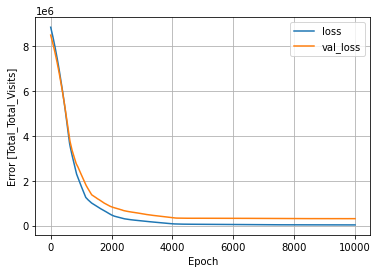

In [91]:
plot_loss(history)

In [92]:
test_results = dnn_model.evaluate(test_features, test_labels, verbose=0)

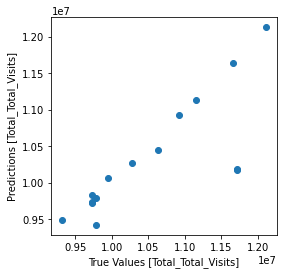

In [93]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Total_Total_Visits]')
plt.ylabel('Predictions [Total_Total_Visits]')
_ = plt.plot()

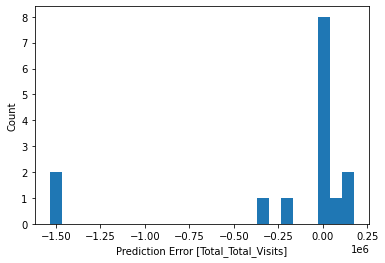

In [94]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Total_Total_Visits]')
_ = plt.ylabel('Count')

In [95]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets
